## Equal 3D-electron density surface plot for edge-wise gaussian plasma profile

We make a plot for the 3D-electron density for edge-wise gaussian plasma profile, just to have a qualitative insight of the geometries. The distribution of $n_{e}$ in this case has the form
$$
n_{e}(r,z) = n_{0}e^{-(\frac{r}{r_{0}})^2}e^{-(\frac{z}{z_0})^{2}} \\
r^2 = x^{2} + y^{2} .
$$

For a given $n_{e}$ we solve for $z$ in terms of $r$

$$
z = \pm \,   \,z_{0}\,\sqrt{\,-ln(\frac{n_e}{n_0}) - (\frac{r}{r_{0}})^2 \, }.
$$

Constants $r_{0}$, $z_{0}$ and $n_{0}$ are taken dimensionless. The important information is their relative size.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from jupyterthemes import jtplot #These two lines can be skipped if you are not using jupyter themes
jtplot.reset()

### First we plot a slice on y axis

In [75]:
r0 = 150.
z0 = r0/10
n0 = 100.
rc = np.linspace(0,50,2000)
n_ = 90

z_ = np.sqrt(-(z0**2*np.log(n_/n0) + z0**2*(rc/r0)**2))

<ipython-input-75-1b3e442671ed>:7: RuntimeWarning: invalid value encountered in sqrt
  z_ = np.sqrt(-(z0**2*np.log(n_/n0) + z0**2*(rc/r0)**2))


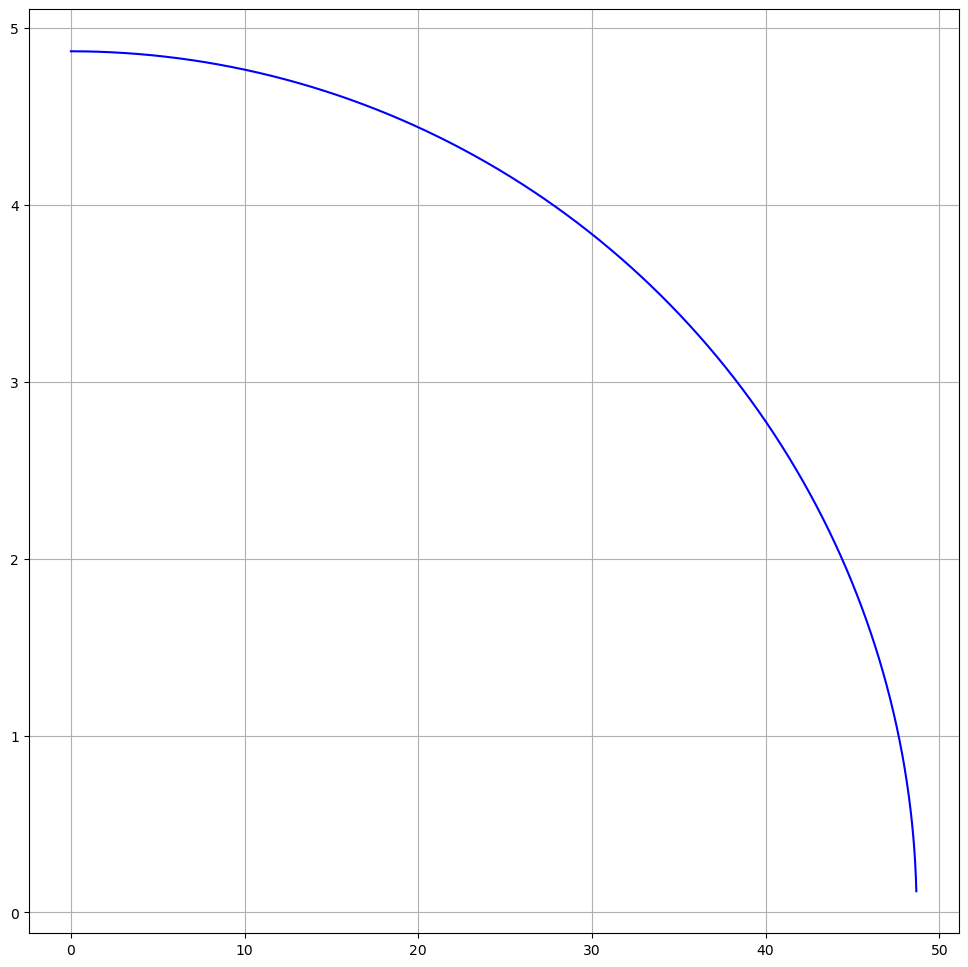

In [76]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
# ax.set_xticks(np.arange(-2., 2., .1))
# ax.set_yticks(np.arange(-5., 5., .1))

plt.plot(rc,z_,c = 'blue')

# plt.gca().set_aspect('equal', adjustable='box')

plt.grid()
plt.show()

### Surface plot forcing equal scales

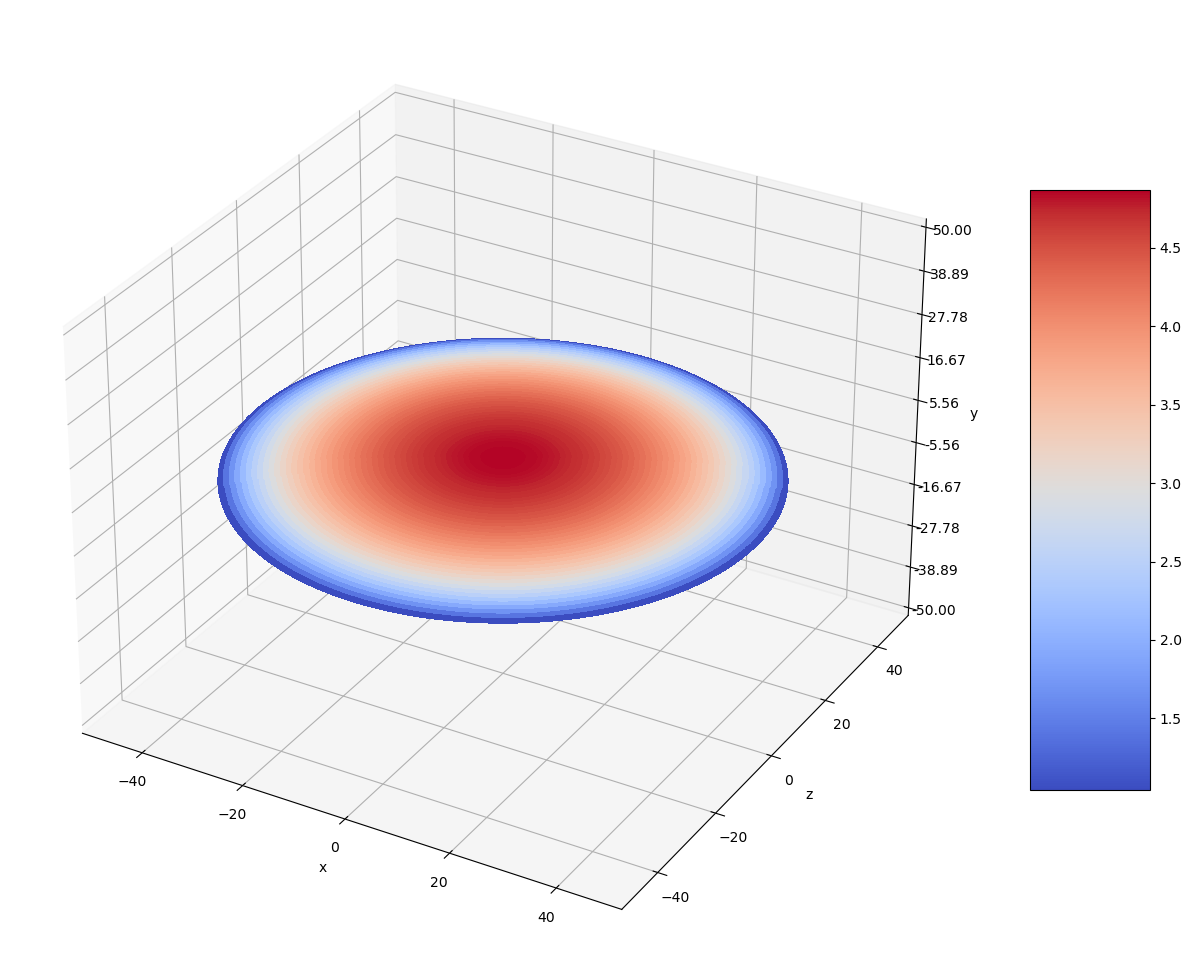

In [93]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.set_xlim3d(-50, 50)
ax.set_ylim3d(-50, 50)
ax.set_zlim3d(-50, 50)

# Make data.
rc = np.linspace(0,48,2000)
theta = np.arange(0,2*np.pi,0.01)
rc, theta = np.meshgrid(rc, theta)

r0 = 150.
z0 = r0/10
n0 = 100.
n_ = 90

z_ = np.sqrt(-(z0**2*np.log(n_/n0) + z0**2*(rc/r0)**2))

# Plot the surface.
surf = ax.plot_surface(rc*np.cos(theta), rc*np.sin(theta), z_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()